In [2]:
import pandas as pd
import numpy as np
import pickle
from pymongo import MongoClient
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.metrics import accuracy_score

### Objetivo
El objetivo del modelo de Machine Learning es predecir y obtener estadisticas de distintos jugadores de Valorant, para que puedan comparar el nivel de juego que tienen con el de jugadores profesionales. <br>
Esto ya que en los ultimos anios la popularizacion de los deportes electronicos a incrementado, hay jugadores profesionales que viven de jugar videojuegos y de la escena competitiva que genera (Muy similar al futbol), por lo cual el area de analisis de datos a incrementado, llevando incluso a equipos profesionales a contrarar personas con estas abilidades para incrementar las posibilidades de ganar de sus equipos

### Extraccion
Extraccion y carga de los datos previamente scrapeados en el archivo scraping.ipynb

In [3]:
client = MongoClient('localhost', 27017)
db = client['dataframe']
coleccion_enlaces = db['estadisticas']

In [4]:
cursor = coleccion_enlaces.find()
df = pd.DataFrame(list(cursor))

### Analisis

In [5]:
df.shape

(55437, 23)

Podemos observar a continuacion que a pesar de que nuestros datos son numericos estos son guardados en strings, por lo cual mas adelante se convertira el tipo de dato para obtener mejor analisis de los mismos.

In [6]:
df.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55437 entries, 0 to 55436
Data columns (total 23 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   _id     55437 non-null  object
 1   Mapa    55437 non-null  int64 
 2   Player  55437 non-null  object
 3   Agents  55437 non-null  object
 4   Rnd     55437 non-null  object
 5   R       55437 non-null  object
 6   ACS     55437 non-null  object
 7   K:D     55437 non-null  object
 8   KAST    55437 non-null  object
 9   ADR     55437 non-null  object
 10  KPR     55437 non-null  object
 11  APR     55437 non-null  object
 12  FKPR    55437 non-null  object
 13  FDPR    55437 non-null  object
 14  HS%     55437 non-null  object
 15  CL%     55437 non-null  object
 16  CL      55437 non-null  object
 17  KMax    55437 non-null  object
 18  K       55437 non-null  object
 19  D       55437 non-null  object
 20  A       55437 non-null  object
 21  FK      55437 non-null  object
 22  FD      55437 non-null

In [7]:
df.head(20)

,_id,Mapa,Player,Agents,Rnd,R,ACS,K:D,KAST,ADR,...,FDPR,HS%,CL%,CL,KMax,K,D,A,FK,FD
0,6434be7358ee100ed49ba74c,1,Juicy\nBLD,jett,192,1.73,263.1,1.23,94%,154.0,...,0.15,31%,26%,6/23,26,170,138,34,39,29
1,6434be7358ee100ed49ba74d,1,hyeoni\nMang,jett,73,1.66,334.3,2.18,84%,194.3,...,0.04,32%,31%,5/16,31,87,40,8,6,3
2,6434be7358ee100ed49ba74e,1,Bazzi\nGES,jett,373,1.62,240.1,1.20,83%,150.2,...,0.09,18%,14%,7/49,25,312,260,52,61,33
3,6434be7358ee100ed49ba74f,1,HANLING\nEsG,jett,68,1.60,223.7,1.22,83%,137.7,...,0.10,22%,,0/8,30,56,46,9,8,7
4,6434be7358ee100ed49ba750,1,RedKoh\nX10,jett,55,1.53,223.3,1.26,65%,138.9,...,0.13,19%,38%,3/8,23,44,35,2,11,7
5,6434be7358ee100ed49ba751,1,frz\nMIBR,jett,121,1.51,272.5,1.67,82%,151.9,...,0.08,24%,17%,2/12,27,120,72,18,21,10
6,6434be7358ee100ed49ba752,1,jammyz\nDZ,jett,127,1.48,201.3,1.08,82%,119.9,...,0.12,21%,8%,2/24,23,95,88,19,22,15
7,6434be7358ee100ed49ba753,1,Leu\nBoos,jett,198,1.48,256.3,1.23,76%,160.3,...,0.13,20%,15%,4/26,25,179,145,26,42,26
8,6434be7358ee100ed49ba754,1,elllement\nCGN,jett,55,1.48,222.3,1.00,87%,162.3,...,0.13,16%,,0/1,16,43,43,9,6,5
9,6434be7358ee100ed49ba755,1,franzera\nRETA,jett,62,1.45,314.3,1.84,76%,163.1,...,0.13,26%,,0/6,26,70,38,6,20,8


In [8]:
df.describe()

,Mapa
count,55437.000000
mean,4.353428
std,2.680292
min,1.000000
25%,2.000000
50%,5.000000
75%,6.000000
max,11.000000


Cambio de tipo de dato de las columnas de nuestro dataset

In [9]:
df['Rnd'] = df['Rnd'].astype(float)
df['R'] = df['R'].replace('', np.nan)
df['R'] = df['R'].astype(float)

df['ACS'] = df['ACS'].astype(float)
df['K:D'] = df['K:D'].astype(float)

df['ADR'] = df['ADR'].replace('', np.nan)
df['ADR'] = df['ADR'].astype(float)
df['KPR'] = df['KPR'].astype(float)
df['APR'] = df['APR'].astype(float)
df['FKPR'] = df['FKPR'].astype(float)

df['FDPR'] = df['FDPR'].replace('', np.nan)
df['FDPR'] = df['FDPR'].astype(float)


df['KMax'] = df['KMax'].astype(int)
df['K'] = df['K'].astype(int)
df['D'] = df['D'].astype(int)
df['A'] = df['A'].astype(int)
df['FK'] = df['FK'].astype(int)
df['FD'] = df['FD'].astype(int)

df['KAST'] = df['KAST'].replace('', np.nan)
df['KAST'] = df['KAST'].str.rstrip('%').astype(float)/100

df['CL%'] = df['CL%'].replace('', np.nan)
df['CL%'] = df['CL%'].str.rstrip('%').astype(float)/100

Empezamos a analisar respecto a las partidas jugadas (Rnd) debido a que siempre se espera a que mientras mas se realize una actividad mas bueno eres en esta, por lo que podremos ver un poco de esta "verdad" en las siguientes graficas

La puntuación media de combate (ACS) en Valorant es una métrica que puede utilizarse para determinar el rendimiento de un jugador en una partida determinada.

La puntuación media de combate también tiene en cuenta el daño, las muertes múltiples y las asistencias no dañinas. El daño y las asistencias desempeñan un papel muy importante en Valorant y, aunque no consigas muchas muertes, conseguir muchas asistencias puede ayudarte a aumentar tu ACS.

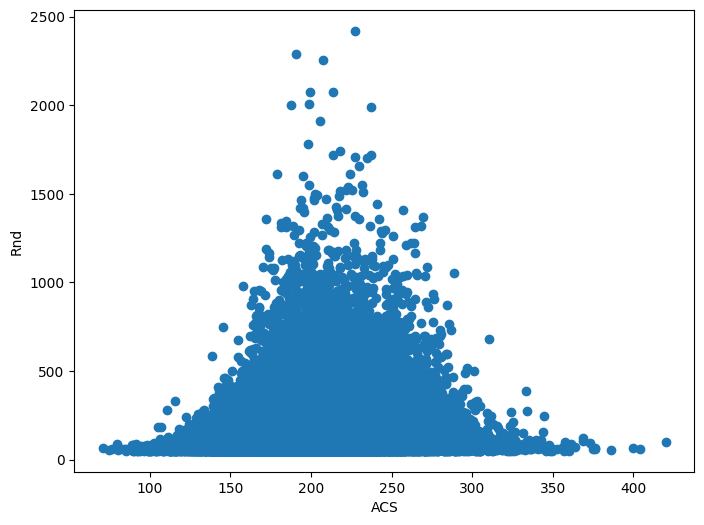

In [10]:
#Rnd = Rondas jugadas
#ACS = Average combat Score (Que tan bien juegas)
plt.figure(figsize=(8, 6))
plt.scatter(df['ACS'], df['Rnd'])
plt.xlabel('ACS')
plt.ylabel('Rnd')
plt.show()

Según las estadísticas más recientes del sitio de seguimiento tracker.gg, los jugadores profesionales de VALORANT mejor clasificados tienen una ADR (media de daño por asalto) de entre 160 y 174.

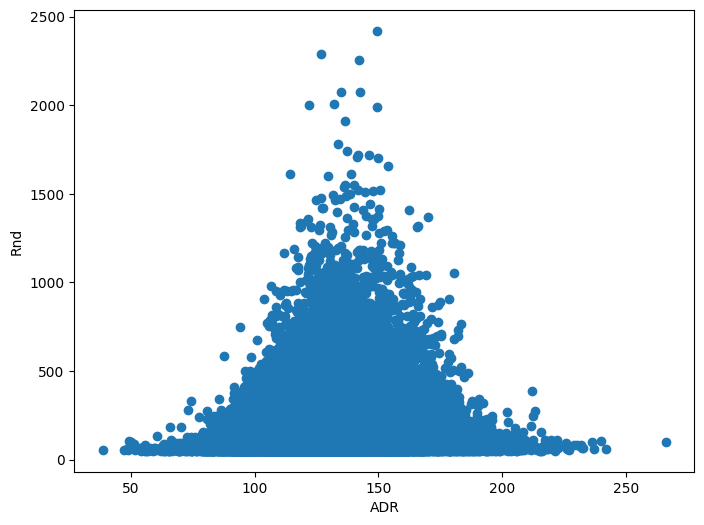

In [11]:
#Rnd = Rondas jugadas
#ADR = Average Damage Score (media de daño por asalto)
plt.figure(figsize=(8, 6))
plt.scatter(df['ADR'], df['Rnd'])
plt.xlabel('ADR')
plt.ylabel('Rnd')
plt.show()

El valor medio es de 0,67 KPR, lo que significa que el jugador medio consigue unas 2 muertes cada 3 rondas.

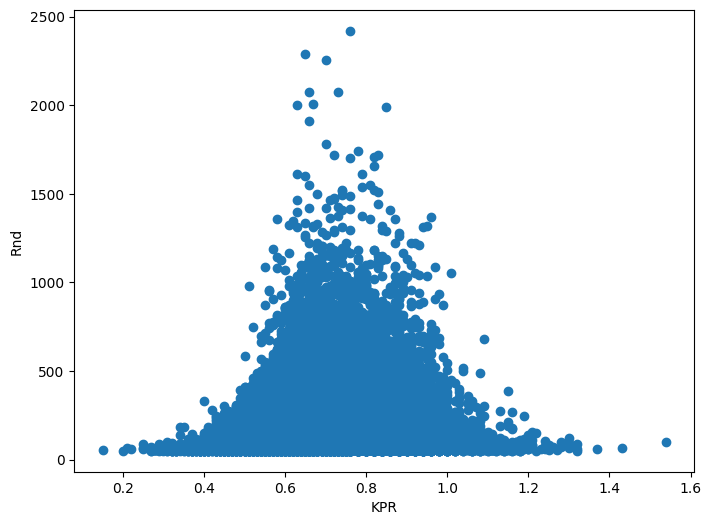

In [12]:
plt.figure(figsize=(8, 6))
plt.scatter(df['KPR'], df['Rnd'])
plt.xlabel('KPR')
plt.ylabel('Rnd')
plt.show()

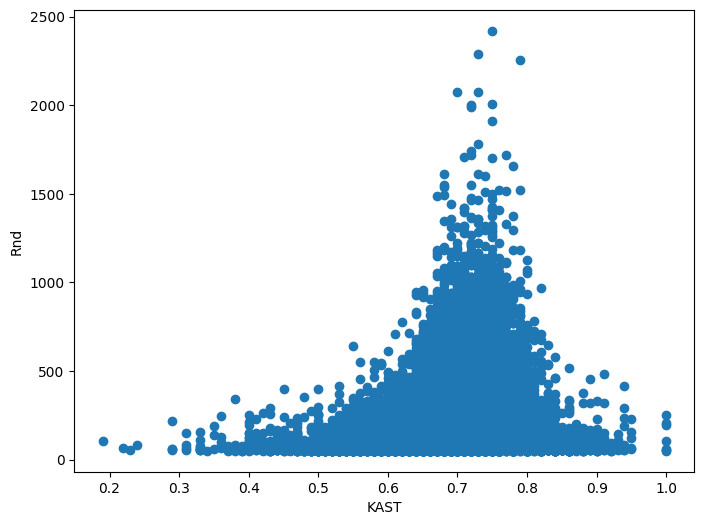

In [13]:
plt.figure(figsize=(8, 6))
plt.scatter(df['KAST'], df['Rnd'])
plt.xlabel('KAST')
plt.ylabel('Rnd')
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


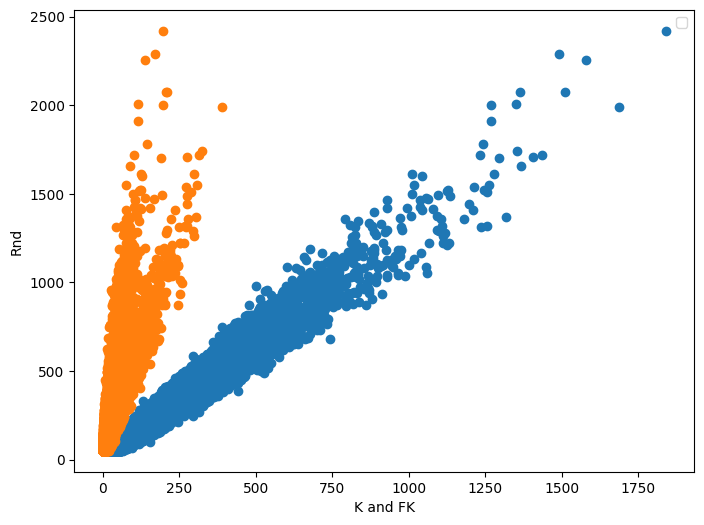

In [14]:
plt.figure(figsize=(8, 6))
plt.scatter(df['K'], df['Rnd'])
plt.scatter(df['FK'], df['Rnd'])
plt.xlabel('K and FK')
plt.ylabel('Rnd')
plt.legend()
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


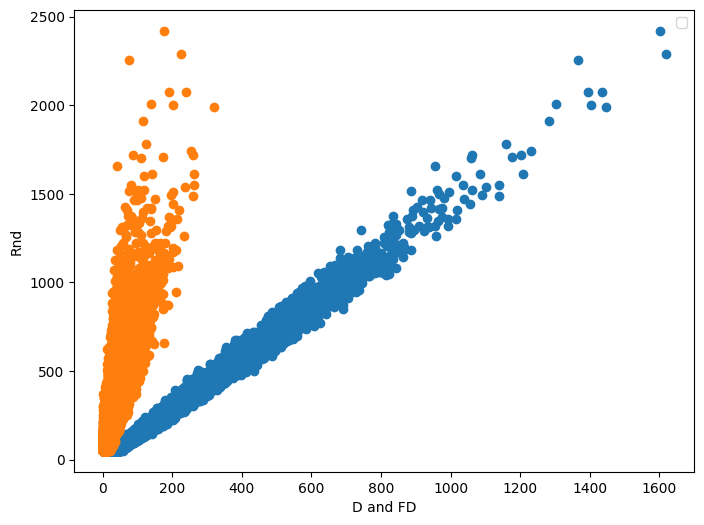

In [15]:
plt.figure(figsize=(8, 6))
plt.scatter(df['D'], df['Rnd'])
plt.scatter(df['FD'], df['Rnd'])
plt.xlabel('D and FD')
plt.ylabel('Rnd')
plt.legend()
plt.show()

### Pre-procesamiento

In [16]:
#Datos sin interes o importancia en el dataset
df = df.drop(['_id','Player','HS%','CL%','CL'], axis=1)

In [17]:
# Transformar los datos de agantes a valores numericos
# Crear una instancia de LabelEncoder
encoder = LabelEncoder()
# Aplicar LabelEncoder a la columna 'Agentes'
df['Agentes_numerico'] = encoder.fit_transform(df['Agents'])

In [18]:
#Ver la cantidad de datos vacios en el dataset
print(df.isnull().sum())

Mapa                   0
Agents                 0
Rnd                    0
R                   5019
ACS                    0
K:D                    0
KAST                5019
ADR                  170
KPR                    0
APR                    0
FKPR                   0
FDPR                 186
KMax                   0
K                      0
D                      0
A                      0
FK                     0
FD                     0
Agentes_numerico       0
dtype: int64


Llenamos con el promedio los datos faltantes

In [19]:
df = df.fillna(df.mean())

C:\Users\luian\AppData\Local\Temp\ipykernel_21888\114435927.py:1: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df = df.fillna(df.mean())


In [20]:
df.shape

(55437, 19)

In [21]:
df.describe()

,Mapa,Rnd,R,ACS,K:D,KAST,ADR,KPR,APR,FKPR,FDPR,KMax,K,D,A,FK,FD,Agentes_numerico
count,55437.000000,55437.000000,55437.000000,55437.000000,55437.000000,55437.000000,55437.000000,55437.000000,55437.000000,55437.000000,55437.000000,55437.000000,55437.000000,55437.000000,55437.000000,55437.000000,55437.000000,55437.000000
mean,4.353428,151.556848,0.967058,199.280867,0.973818,0.695150,129.520696,0.692955,0.263023,0.097145,0.102063,21.041308,107.386493,107.539297,40.311471,15.236088,15.033371,10.377383
std,2.680292,146.822832,0.167110,35.498980,0.227245,0.065303,21.894276,0.130175,0.108675,0.055431,0.049664,5.191383,110.995594,100.738256,45.209403,19.548591,16.588907,6.101603
min,1.000000,50.000000,0.050000,70.700000,0.160000,0.190000,38.500000,0.150000,0.000000,0.000000,0.000000,5.000000,8.000000,21.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,67.000000,0.870000,175.200000,0.820000,0.660000,114.700000,0.610000,0.180000,0.060000,0.070000,17.000000,46.000000,50.000000,16.000000,5.000000,6.000000,4.000000
50%,5.000000,99.000000,0.967058,197.300000,0.960000,0.695150,128.900000,0.690000,0.250000,0.080000,0.090000,21.000000,69.000000,72.000000,26.000000,9.000000,10.000000,10.000000
75%,6.000000,172.000000,1.070000,221.700000,1.110000,0.740000,143.500000,0.780000,0.330000,0.130000,0.130000,24.000000,122.000000,123.000000,47.000000,17.000000,18.000000,16.000000
max,11.000000,2420.000000,2.140000,420.300000,2.640000,1.000000,266.400000,1.540000,0.980000,0.430000,0.390000,49.000000,1842.000000,1620.000000,979.000000,389.000000,321.000000,20.000000


In [22]:
df.corr()

C:\Users\luian\AppData\Local\Temp\ipykernel_21888\1134722465.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,Mapa,Rnd,R,ACS,K:D,KAST,ADR,KPR,APR,FKPR,FDPR,KMax,K,D,A,FK,FD,Agentes_numerico
Mapa,1.000000,-0.060267,0.059122,0.052094,0.055992,0.027124,0.083358,0.055017,0.036245,0.025854,-0.005100,0.004572,-0.051765,-0.061730,-0.042881,-0.045363,-0.052039,0.015620
Rnd,-0.060267,1.000000,0.162743,0.122052,0.159137,0.143255,0.111348,0.123855,0.028517,0.064205,-0.037581,0.410790,0.981475,0.993842,0.892138,0.816109,0.841707,0.054239
R,0.059122,0.162743,1.000000,0.693220,0.830537,0.709045,0.663131,0.719220,0.111656,0.292933,-0.178159,0.476751,0.250836,0.120867,0.168594,0.227965,0.088803,-0.017521
ACS,0.052094,0.122052,0.693220,1.000000,0.823322,0.372615,0.947017,0.957782,-0.165390,0.630960,0.173936,0.645566,0.253485,0.120733,0.032146,0.348853,0.210551,0.038318
K:D,0.055992,0.159137,0.830537,0.823322,1.000000,0.543459,0.772796,0.896159,-0.086239,0.399329,-0.097102,0.610470,0.272743,0.116595,0.098151,0.272117,0.123437,-0.033523
KAST,0.027124,0.143255,0.709045,0.372615,0.543459,1.000000,0.354283,0.397469,0.362752,0.037641,-0.323681,0.270136,0.181795,0.102737,0.234572,0.101418,0.002215,-0.021064
ADR,0.083358,0.111348,0.663131,0.947017,0.772796,0.354283,1.000000,0.899779,-0.154588,0.562582,0.141663,0.640684,0.233404,0.109545,0.031762,0.306335,0.180430,0.076265
KPR,0.055017,0.123855,0.719220,0.957782,0.896159,0.397469,0.899779,1.000000,-0.219791,0.591967,0.122706,0.695597,0.259123,0.115575,0.017186,0.335447,0.193578,-0.024300
APR,0.036245,0.028517,0.111656,-0.165390,-0.086239,0.362752,-0.154588,-0.219791,1.000000,-0.390586,-0.355576,-0.158534,-0.017043,0.007290,0.348129,-0.165632,-0.141249,0.037098
FKPR,0.025854,0.064205,0.292933,0.630960,0.399329,0.037641,0.562582,0.591967,-0.390586,1.000000,0.525636,0.417402,0.160297,0.089100,-0.103496,0.458496,0.313347,-0.065357


C:\Users\luian\AppData\Local\Temp\ipykernel_21888\1633236675.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


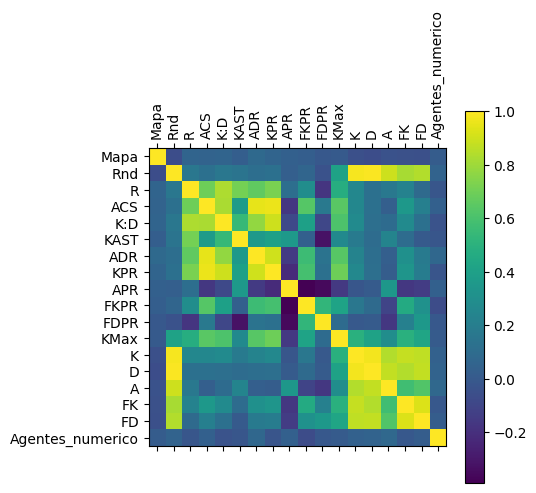

In [23]:
correlation_matrix = df.corr()

# Crear la gráfica de correlación
plt.matshow(correlation_matrix)
plt.xticks(range(len(correlation_matrix.columns)), correlation_matrix.columns, rotation='vertical')
plt.yticks(range(len(correlation_matrix.columns)), correlation_matrix.columns)
plt.colorbar()
plt.show()

In [24]:
correlation_Y = correlation_matrix['KAST'].drop('KAST')

dependiente  = correlation_Y[correlation_Y.abs() > 0.2].index.tolist()
independiente  = correlation_Y[correlation_Y.abs() <= 0.2].index.tolist()

print(f'Variable dependiente {dependiente}\nVariable independiente {independiente}')

Variable dependiente ['R', 'ACS', 'K:D', 'ADR', 'KPR', 'APR', 'FDPR', 'KMax', 'A']
Variable independiente ['Mapa', 'Rnd', 'FKPR', 'K', 'D', 'FK', 'FD', 'Agentes_numerico']


In [25]:
df.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55437 entries, 0 to 55436
Data columns (total 19 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Mapa              55437 non-null  int64  
 1   Agents            55437 non-null  object 
 2   Rnd               55437 non-null  float64
 3   R                 55437 non-null  float64
 4   ACS               55437 non-null  float64
 5   K:D               55437 non-null  float64
 6   KAST              55437 non-null  float64
 7   ADR               55437 non-null  float64
 8   KPR               55437 non-null  float64
 9   APR               55437 non-null  float64
 10  FKPR              55437 non-null  float64
 11  FDPR              55437 non-null  float64
 12  KMax              55437 non-null  int32  
 13  K                 55437 non-null  int32  
 14  D                 55437 non-null  int32  
 15  A                 55437 non-null  int32  
 16  FK                55437 non-null  int32 

### Modelado

In [26]:
datos_unicos = df.drop_duplicates(subset=['Agents', 'Agentes_numerico'])
datos_unicos.head(30)

,Mapa,Agents,Rnd,R,ACS,K:D,KAST,ADR,KPR,APR,FKPR,FDPR,KMax,K,D,A,FK,FD,Agentes_numerico
0,1,jett,192.0,1.73,263.1,1.23,0.94,154.0,0.89,0.18,0.20,0.15,26,170,138,34,39,29,8
6390,1,astra,76.0,1.51,284.8,2.05,0.82,183.2,1.03,0.24,0.12,0.07,25,78,38,18,9,5,0
9626,1,breach,52.0,1.49,239.0,2.24,0.94,162.0,0.90,0.44,0.08,0.02,19,47,21,23,4,1,1
12898,1,brimstone,254.0,1.60,173.1,0.92,1.00,110.4,0.58,0.41,0.05,0.09,17,147,159,105,13,22,2
14409,1,chamber,55.0,1.71,386.0,1.89,0.80,227.2,1.27,0.22,0.27,0.07,31,70,37,12,15,4,3
17381,1,cypher,78.0,1.52,191.3,1.17,0.67,120.7,0.72,0.17,0.08,0.06,20,56,48,13,6,5,4
20312,1,fade,63.0,1.35,213.0,1.72,0.84,132.3,0.79,0.37,0.06,0.02,20,50,29,23,4,1,5
21760,6,gekko,62.0,1.28,247.3,1.32,0.77,174.2,0.87,0.34,0.10,0.05,24,54,41,21,6,3,6
21765,5,harbor,106.0,1.02,207.2,1.00,0.69,128.5,0.82,0.30,0.05,0.06,23,87,87,32,5,6,7
21847,1,kayo,60.0,1.47,213.7,2.13,0.85,133.2,0.82,0.47,0.05,0.05,17,49,23,28,3,3,9


In [27]:
df = df.drop(['Agents'], axis=1)

In [28]:
#Variables dependiente ['R', 'ACS', 'K:D', 'ADR', 'KPR', 'APR', 'FDPR'] <br>
#Variables independiente ['Mapa', 'Rnd', 'FKPR', 'KMax', 'K', 'D', 'A', 'FK', 'FD', 'Agentes_numerico'] <br><br><br>
#67%
#Variable dependiente ['R', 'ACS', 'K:D', 'ADR', 'KPR', 'APR', 'FDPR', 'KMax', 'A']<br>
#Variable independiente ['Mapa', 'Rnd', 'FKPR', 'K', 'D', 'FK', 'FD', 'Agentes_numerico']
#59%

In [29]:
df.shape

(55437, 18)

In [30]:
X = df[['Mapa', 'Agentes_numerico','Rnd','APR','KPR','KMax']]

y = df[['KAST', 'ACS', 'ADR','R', 'K:D','K', 'D', 'A']]
#'FK','FD','FDPR','FKPR'
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, train_size=0.7, random_state=42)

model = LinearRegression()

model.fit(X_train,y_train)



Y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, Y_pred) #Mide el promedio de los errores cuadrados entre las predicciones. Entre mas bajo indica un mejor ajuste al modelo
mae = mean_absolute_error(y_test, Y_pred) #Un MAE más bajo indica un mejor ajuste del modelo a los datos.
r2 = r2_score(y_test, Y_pred) #Un valor de R cuadrado más cercano a 1 indica un mejor ajuste del modelo a los datos.
print("Error cuadrático medio (MSE):", mse)
print("Error cuadrático medio (MAE):", mae)
print("Coeficiente de determinación (R²):", r2)
print(f'Score train: {model.score(X_train,y_train)}')
print(f'Score test: {model.score(X_test,y_test)}')
print(Y_pred.shape)
print(Y_pred)

Error cuadrático medio (MSE): 88.74238195461696
Error cuadrático medio (MAE): 4.653343679935531
Coeficiente de determinación (R²): 0.8021813060770325
Score train: 0.8023466948435365
Score test: 0.8021813060770325
(16632, 8)
[[  0.73342664 170.51873432 112.25465152 ...  27.84454344  44.84325155
   51.02554265]
 [  0.74965744 237.71210545 151.78710602 ...  97.6492852   81.14871129
   40.63715807]
 [  0.62869022 177.28071011 115.41462383 ...  41.68417032  55.12910048
   -4.50331227]
 ...
 [  0.6374667  138.21140031  91.53317245 ...  22.20775621  51.41756778
   15.67831766]
 [  0.67140899 198.00354737 129.58256049 ...  36.020779    43.46871737
    5.64998785]
 [  0.61491652 106.446681    75.18111387 ...  -1.4118205   46.48927216
   21.62444463]]


### Resultado

In [31]:
# Verificar los nombres de las características en los conjuntos de entrenamiento
print(X_train.columns.tolist())
print(y_train.columns.tolist())

['Mapa', 'Agentes_numerico', 'Rnd', 'APR', 'KPR', 'KMax']
['KAST', 'ACS', 'ADR', 'R', 'K:D', 'K', 'D', 'A']


In [32]:
#X = df[['Mapa', 'Agentes_numerico','Rnd','APR','KPR','KMax']]
X_nuevo = [[1,8,10,0.13,1.25,30]]
y_pred = model.predict(X_nuevo)
print(f'Prediccion: {y_pred}')
#y = df[['KAST', 'ACS', 'ADR','R', 'K:D','K', 'D', 'A']]

# R ACS K:D KAST ADR KPR APR FKPR FDPR HS CL% CL KMax, K D A FK    

Prediccion: [[  0.79516136 345.70656677 211.70980145   1.46402314   1.83230046
   71.5896127    6.69832427 -19.88228197]]


c:\Users\luian\DevSpace\Who_Agent_On_What_Map\env\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [33]:
# Guardar el modelo entrenado en un archivo
with open('modelo_regresion.pkl', 'wb') as file:
    pickle.dump(model, file)

### Mejoras 
- Agregar al dataset juegos con un Rnd mas bajo aunque suele haber mas datos faltantes en algunas columnas (R, KAST) (?)
- Quitar del dataframe los valores atipicos de Rnd
- 